# Custom Theme

In [1]:
from lets_plot import *

In [2]:
LetsPlot.setup_html()

In [3]:
def get_data():
    import pandas as pd
    df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
    return df.drop(columns=["Unnamed: 0"])

In [4]:
df = get_data()
print(df.shape)
df.head()

(234, 11)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
def bar_title(subtitle):
    return ggtitle("Bar plot", subtitle)

def bar_plot(*, color="fl", facet=False, sampling=None):
    p = ggplot(df) + \
        geom_bar(aes("fl", color=color, fill=color),
                 sampling=sampling,
                 tooltips=layer_tooltips().title("Fuel type: @fl").line("count|@..count.."),
                 labels=layer_labels().line("@..count.."))
    if facet:
        p += facet_grid(x="year")
    return p

def point_title(subtitle):
    return ggtitle("Point plot", subtitle)

def point_plot(*, size_only=False, color_only=False):
    aesthetics = {}
    if not color_only:
        aesthetics['size'] = "cyl"
    if not size_only:
        aesthetics['color'] = "drv"
    return ggplot(df, aes("cty", "hwy")) + \
        geom_point(aes(**aesthetics), alpha=.25)

## Custom Theme

In [6]:
def theme_orange():
    yellow_light = "#ffffcc"
    orange_light = "#fff5eb"
    orange_normal = "#f16913"
    orange_dark = "#7f2704"
    return theme_none() + theme(
        line=element_line(color=orange_normal, size=2),
        rect=element_rect(color=orange_normal, fill=orange_light, size=2),
        text=element_text(color=orange_dark),
        geom=element_geom(pen=orange_dark),
        axis_ontop=True,
        axis_ticks=element_line(color=orange_normal, size=2),
        axis_ticks_length=7,
        legend_background=element_rect(size=2, fill=orange_light),
        legend_position='bottom',
        panel_grid_major=element_line(color=orange_normal, size=1),
        panel_grid_minor='blank',
        plot_background=element_rect(fill=yellow_light, size=2),
        plot_title=element_text(size=20, face='bold'),
        axis_tooltip=element_rect(color=orange_dark)
    )

In [7]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + theme_orange() + bar_title("Custom theme"),
])

## Theme Elements

### Lines

In [8]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(panel_grid=element_line(color="red", size=2, linetype='longdash')) + \
        bar_title("Custom element_line() for panel grid"),
])

### Rectangles

In [9]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(panel_background=element_rect(color="black", fill="lightgray", size=2, linetype='longdash')) + \
        bar_title("Custom element_rect() for panel background"),
])

### Texts

In [10]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(axis_text_y=element_text(color="red", family="Times",
                                       face='bold', size=20, angle=15,
                                       margin=[0, 15], vjust=.5)) + \
        bar_title("Custom element_text() for y-axis text"),
])

In [11]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(plot_title=element_text(size=20, hjust=.5, margin=[20, 0, 10])) + \
        bar_title("Custom element_text() for plot_title"),
])

#### Markdown

In [12]:
gggrid([
    bar_plot() + bar_title("<span style='color:red'>**Markdown**</span> in _text_"),
    bar_plot() + \
        theme(title=element_markdown()) + \
        bar_title("<span style='color:red'>**Markdown**</span> in _text_"),
], ncol=2)

### Geometries

In [13]:
gggrid([
    bar_plot(color=None) + bar_title("Default"),
    bar_plot(color=None) + \
        theme(geom=element_geom(brush="yellow", paper="red")) + \
        bar_title("Custom element_geom() for geom"),
])

### Blank

In [14]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(panel_grid=element_blank()) + \
        bar_title("panel_grid=element_blank()"),
    bar_plot() + \
        theme(panel_grid='blank') + \
        bar_title("panel_grid='blank'"),
    bar_plot() + \
        theme(panel_grid=element_line(blank=True)) + \
        bar_title("panel_grid=element_line(blank=True)"),
], ncol=2)

## Theme Parameters

### All Elements of Given Type

#### `line`

In [15]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(line=element_line(linetype='longdash')) + \
        bar_title("Custom line"),
])

#### `rect`

In [16]:
# The default theme has defaults for most rectangular elements,
# so we need to switch to another predefined theme to see the effect

gggrid([
    bar_plot() + theme_light() + bar_title("Default"),
    bar_plot() + theme_light() + \
        theme(rect=element_rect(linetype='longdash')) + \
        bar_title("Custom rect"),
])

#### `text` and `title`

In [17]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(text=element_text(color="red")) + \
        bar_title("Custom text"),
    bar_plot() + \
        theme(title=element_text(color="blue")) + \
        bar_title("Custom title"),
    bar_plot() + \
        theme(text=element_text(color="red"), title=element_text(color="blue")) + \
        bar_title("Custom text and title"),
], ncol=2)

### Axes

#### `axis`

In [18]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(axis=element_line(color="red", size=3)) + \
        bar_title("Custom axis"),
])

#### `axis_ontop`

In [19]:
gggrid([
    bar_plot() + \
        theme(axis=element_text(size=4)) + \
        bar_title("axis_ontop=True (default)"),
    bar_plot() + \
        theme(axis=element_text(size=4), axis_ontop=False) + \
        bar_title("axis_ontop=False"),
])

#### `axis_title`

In [20]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(axis_title=element_text(color="red")) + \
        bar_title("Custom axis_title"),
])

#### `axis_text`

In [21]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(axis_text=element_text(color="red")) + \
        bar_title("Custom axis_text"),
])

#### `axis_ticks` and `axis_ticks_length`

In [22]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(axis_ticks=element_line(color="red", size=3)) + \
        bar_title("Custom axis_ticks"),
    bar_plot() + \
        theme(axis_ticks_length=10) + \
        bar_title("Custom axis_ticks_length"),
])

#### `axis_text_spacing`

In [23]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(axis_text_spacing_x=30) + \
        bar_title("Custom axis_text_spacing_x"),
    bar_plot() + \
        theme(axis_text_spacing_y=30) + \
        bar_title("Custom axis_text_spacing_y"),
    bar_plot() + \
        theme(axis_text_spacing=30) + \
        bar_title("Custom axis_text_spacing"),
], ncol=2)

#### `axis_line`

In [24]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(axis_line=element_line(color="red", size=3)) + \
        bar_title("Custom axis_line"),
    bar_plot() + \
        theme(axis=element_line(color="red", size=3),
              axis_line=element_line(color="blue", size=3)) + \
        bar_title("axis vs. axis_line"),
])

### Legend

#### `legend_background`

In [25]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(legend_background=element_rect(fill="lightgray")) + \
        bar_title("Custom legend_background"),
])

#### `legend_text`

In [26]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(legend_text=element_text(color="red")) + \
        bar_title("Custom legend_text"),
])

#### `legend_title`

In [27]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(legend_title=element_text(color="red")) + \
        bar_title("Custom legend_title"),
])

#### `legend_margin`

In [28]:
def bar_plot_with_highlighted_legend():
    return bar_plot() + theme(legend_background=element_rect(size=1))

gggrid([
    bar_plot_with_highlighted_legend() + \
        bar_title("Default"),
    bar_plot_with_highlighted_legend() + \
        theme(legend_margin=25) + \
        bar_title("Custom legend_margin"),
], ncol=2)

#### `legend_position` and `legend_justification`

In [29]:
# Let's set a custom theme to see what happens when parameters are specified

gggrid([
    bar_plot() + \
        theme_bw() + \
        bar_title("Default"),
    bar_plot() + \
        theme_bw() + theme(legend_position='top') + \
        bar_title("legend_position='top'"),
    bar_plot() + \
        theme_bw() + theme(legend_position=[1, 1]) + \
        bar_title("legend_position=[1, 1]"),
    bar_plot() + \
        theme_bw() + theme(legend_position=[1, 1], legend_justification=[1, 1]) + \
        bar_title("legend_position=[1, 1],\nlegend_justification=[1, 1]"),
], ncol=2)

#### `legend_direction`

In [30]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(legend_direction='horizontal') + \
        bar_title("Custom legend_direction"),
])

#### `legend_box` and `legend_box_just`

In [31]:
gggrid([
    point_plot() + point_title("Default"),
    point_plot() + \
        theme(legend_box='horizontal') + \
        point_title("legend_box='horizontal'"),
    point_plot() + \
        theme(legend_box='horizontal', legend_box_just='center') + \
        point_title("legend_box='horizontal'\nlegend_box_just='center'"),
    point_plot() + \
        theme(legend_box='horizontal', legend_box_just='bottom') + \
        point_title("legend_box='horizontal'\nlegend_box_just='bottom'"),
], ncol=2)

#### `legend_box_spacing` and `legend_spacing`

In [32]:
gggrid([
    point_plot() + \
        point_title("Default"),
    point_plot() + \
        theme(legend_box_spacing=50) + \
        point_title("Custom legend_box_spacing"),
    point_plot() + \
        theme(legend_spacing=50) + \
        point_title("Custom legend_spacing"),
], ncol=2)

#### `legend_key`

In [33]:
gggrid([
    point_plot(size_only=True) + \
        point_title("Default"),
    point_plot(size_only=True) + \
        theme(legend_key=element_rect(fill="yellow")) + \
        point_title("Custom legend_key"),
])

#### `legend_key_size`, `legend_key_width/height` and `legend_key_spacing`

In [34]:
def point_plot_with_highlighted_legend_key():
    return point_plot(size_only=True) + theme(legend_key=element_rect(size=1, fill="white"))

gggrid([
    point_plot_with_highlighted_legend_key() + \
        point_title("Default"),
    point_plot_with_highlighted_legend_key() + \
        theme(legend_key_size=35) + \
        point_title("Custom legend_key_size"),
    point_plot_with_highlighted_legend_key() + \
        theme(legend_key_width=50) + \
        point_title("Custom legend_key_width"),
    point_plot_with_highlighted_legend_key() + \
        theme(legend_key_spacing=10) + \
        point_title("Custom legend_key_spacing"),
], ncol=2)

#### `legend_ticks`

In [35]:
gggrid([
    bar_plot(color="..count..") + \
        point_title("Default"),
    bar_plot(color="..count..") + \
        theme(legend_ticks=element_line(size=5, color="yellow")) + \
        point_title("Custom legend_ticks"),
])

#### `legend_ticks_length`

In [36]:
gggrid([
    bar_plot(color="..count..") + \
        point_title("Default"),
    bar_plot(color="..count..") + \
        theme(legend_ticks_length=11) + \
        point_title("Custom legend_ticks_length"),
])

### Panel

#### `panel_background` and `panel_border`

In [37]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(panel_background=element_rect(color="black", fill="lightgray")) + \
        bar_title("Custom panel_background"),
    bar_plot() + \
        theme(panel_border=element_rect(size=3, color="red")) + \
        bar_title("Custom panel_border"),
    bar_plot() + \
        theme(panel_background=element_rect(color="black", fill="lightgray"),
              panel_border=element_rect(size=3, color="red")) + \
        bar_title("Custom panel_background and panel_border"),
], ncol=2)

#### `panel_grid`

In [38]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(panel_grid=element_line(linetype='longdash')) + \
        bar_title("Custom panel_grid"),
])

#### `panel_border_ontop`

In [39]:
gggrid([
    bar_plot() + \
        theme(panel_border=element_rect(size=5)) + \
        bar_title("panel_border_ontop=True (default)"),
    bar_plot() + \
        theme(panel_border=element_rect(size=5), panel_border_ontop=False) + \
        bar_title("panel_border_ontop=False"),
])

#### `panel_grid_ontop`

In [40]:
gggrid([
    bar_plot() + \
        bar_title("panel_grid_ontop=False (default)"),
    bar_plot() + \
        theme(panel_grid_ontop=True) + \
        bar_title("panel_grid_ontop=True"),
])

#### `panel_inset`

In [41]:
# Let's set a custom theme to see what happens when panel_inset parameter is specified

gggrid([
    bar_plot() + theme_bw() + bar_title("Default"),
    bar_plot() + theme_bw() + \
        theme(panel_inset=30) + \
        bar_title("panel_inset=30"),
    bar_plot() + theme_bw() + \
        theme(panel_inset=[30]) + \
        bar_title("panel_inset=[30]"),
    bar_plot() + theme_bw() + \
        theme(panel_inset=[30, 15]) + \
        bar_title("panel_inset=[30, 15]"),
    bar_plot() + theme_bw() + \
        theme(panel_inset=[60, 15, 30]) + \
        bar_title("panel_inset=[60, 15, 30]"),
    bar_plot() + theme_bw() + \
        theme(panel_inset=[60, 0, 30, 15]) + \
        bar_title("panel_inset=[60, 0, 30, 15]"),
], ncol=3)

### Plot

#### `plot_background`

In [42]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(plot_background=element_rect(fill="lightgray")) + \
        bar_title("Custom plot_background"),
    bar_plot() + \
        theme(plot_background=element_rect(fill="lightgray"),
              panel_background=element_rect(fill="white")) + \
        bar_title("plot_background vs. panel_background"),
])

#### `plot_title`, `plot_subtitle` and `plot_caption`

In [43]:
gggrid([
    bar_plot() + \
        labs(title="Default title", subtitle="Default subtitle", caption="Default caption"),
    bar_plot() + \
        theme(plot_title=element_text(color="red")) + \
        labs(title="Custom plot_title", subtitle="Default subtitle", caption="Default caption"),
    bar_plot() + \
        theme(plot_subtitle=element_text(color="red")) + \
        labs(title="Default title", subtitle="Custom plot_subtitle", caption="Default caption"),
    bar_plot() + \
        theme(plot_caption=element_text(color="red")) + \
        labs(title="Default title", subtitle="Default subtitle", caption="Custom plot_caption"),
], ncol=2)

#### `plot_title_position` and `plot_caption_position`

In [44]:
gggrid([
    bar_plot() + \
        labs(title="Title: default",
             subtitle="Subtitle: default",
             caption="Caption: default"),
    bar_plot() + \
        theme(plot_title_position='plot') + \
        labs(title="Title: custom plot_title_position",
             subtitle="Subtitle: custom plot_title_position",
             caption="Caption: default"),
    bar_plot() + \
        theme(plot_caption_position='plot') + \
        labs(title="Title: default",
             subtitle="Subtitle: default",
             caption="Caption: custom plot_caption_position"),
], ncol=1)

#### `plot_margin`

In [45]:
# Let's set a custom theme to see what happens when plot_margin parameter is specified

gggrid([
    bar_plot() + theme_bw() + bar_title("Default"),
    bar_plot() + theme_bw() + \
        theme(plot_margin=50) + \
        bar_title("plot_margin=50"),
    bar_plot() + theme_bw() + \
        theme(plot_margin=[50]) + \
        bar_title("plot_margin=[50]"),
    bar_plot() + theme_bw() + \
        theme(plot_margin=[50, 25]) + \
        bar_title("plot_margin=[50, 25]"),
    bar_plot() + theme_bw() + \
        theme(plot_margin=[100, 25, 50]) + \
        bar_title("plot_margin=[100, 25, 50]"),
    bar_plot() + theme_bw() + \
        theme(plot_margin=[100, 0, 50, 25]) + \
        bar_title("plot_margin=[100, 0, 50, 25]"),
], ncol=3)

#### `plot_inset`

In [46]:
# Let's set a custom theme to see what happens when plot_inset parameter is specified

gggrid([
    bar_plot() + theme_bw() + bar_title("Default"),
    bar_plot() + theme_bw() + \
        theme(plot_inset=50) + \
        bar_title("plot_inset=50"),
    bar_plot() + theme_bw() + \
        theme(plot_inset=[50]) + \
        bar_title("plot_inset=[50]"),
    bar_plot() + theme_bw() + \
        theme(plot_inset=[50, 25]) + \
        bar_title("plot_inset=[50, 25]"),
    bar_plot() + theme_bw() + \
        theme(plot_inset=[100, 25, 50]) + \
        bar_title("plot_inset=[100, 25, 50]"),
    bar_plot() + theme_bw() + \
        theme(plot_inset=[100, 0, 50, 25]) + \
        bar_title("plot_inset=[100, 0, 50, 25]"),
], ncol=3)

#### `plot_margin` vs. `plot_inset` vs. `panel_inset`

In [47]:
# Let's set a custom theme to see what happens when parameters are specified

gggrid([
    bar_plot() + theme_bw() + bar_title("Default"),
    bar_plot() + theme_bw() + \
        theme(plot_margin=50) + \
        bar_title("plot_margin=50"),
    bar_plot() + theme_bw() + \
        theme(plot_inset=50) + \
        bar_title("plot_inset=50"),
    bar_plot() + theme_bw() + \
        theme(panel_inset=50) + \
        bar_title("panel_inset=50"),
], ncol=2)

#### `plot_message`

In [48]:
gggrid([
    bar_plot(sampling=sampling_pick(3)) + bar_title("Default"),
    bar_plot(sampling=sampling_pick(3)) + \
        theme(plot_message='blank') + \
        bar_title("plot_message='blank'"),
])

### Facetting

#### `strip_background`

In [49]:
gggrid([
    bar_plot(facet=True) + bar_title("Default"),
    bar_plot(facet=True) + \
        theme(strip_background=element_rect()) + \
        bar_title("Custom strip_background"),
])

#### `strip_text`

In [50]:
gggrid([
    bar_plot(facet=True) + bar_title("Default"),
    bar_plot(facet=True) + \
        theme(strip_text=element_text(color="red")) + \
        bar_title("Custom strip_text"),
])

### Tooltips

#### `tooltip`

In [51]:
# Hover over the plot to see tooltips

gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(tooltip=element_rect(color="red", fill="yellow")) + \
        bar_title("Custom tooltip"),
])

#### `tooltip_text` and `tooltip_title_text`

In [52]:
# Hover over the plot to see tooltips

gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(tooltip_text=element_text(color="red")) + \
        bar_title("Custom tooltip_text"),
    bar_plot() + \
        theme(tooltip_title_text=element_text(color="blue")) + \
        bar_title("Custom tooltip_title_text"),
    bar_plot() + \
        theme(tooltip_text=element_text(color="red"),
              tooltip_title_text=element_text(color="blue")) + \
        bar_title("Custom tooltip_text and tooltip_title_text"),
], ncol=2)

#### `axis_tooltip` and `axis_tooltip_text`

In [53]:
# Hover over the plot to see tooltips

gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(axis_tooltip=element_rect(color="red", fill="blue")) + \
        bar_title("Custom axis_tooltip"),
    bar_plot() + \
        theme(axis_tooltip_text=element_text(color="yellow")) + \
        bar_title("Custom axis_tooltip_text"),
    bar_plot() + \
        theme(axis_tooltip=element_rect(color="red", fill="blue"),
              axis_tooltip_text=element_text(color="yellow")) + \
        bar_title("Custom axis_tooltip and axis_tooltip_text"),
], ncol=2)

### Annotations

#### `label_text`

In [54]:
gggrid([
    bar_plot() + bar_title("Default"),
    bar_plot() + \
        theme(label_text=element_text(size=20, face='bold')) + \
        bar_title("Custom label_text"),
])

### Other

#### `exponent_format`

In [55]:
def exp_bar_plot():
    import numpy as np
    exp = 10**(-6)
    groups = list("abcde")
    np.random.seed(42)
    data = {
        'x': groups,
        'y': exp * np.random.uniform(size=len(groups)),
    }
    return ggplot(data, aes('x', 'y')) + geom_bar(stat='identity')

In [56]:
gggrid([
    exp_bar_plot() + bar_title("exponent_format='e' (default)"),
    exp_bar_plot() + \
        theme(exponent_format='pow') + \
        bar_title("exponent_format='pow'"),
])

## Extra

### Plot Size

#### Default

In [57]:
bar_plot()

#### Custom Size

In [58]:
bar_plot() + ggsize(1000, 200)

#### `ggbunch()`

In [59]:
ggbunch(
    [bar_plot(), bar_plot()],
    [(0, 0, 1, 1), (.6, 0, .4, .75)]
)

#### `gggrid()`

In [60]:
gggrid([
    bar_plot(),
    bar_plot(),
]) + ggsize(1000, 200)

### Labels

#### Set Title

In [61]:
gggrid([
    bar_plot() + ggtitle("Using ggtitle()"),
    bar_plot() + labs(title="Using labs()"),
])

#### Set Subtitle

In [62]:
gggrid([
    bar_plot() + ggtitle("Bar plot", subtitle="Using ggtitle()"),
    bar_plot() + labs("Bar plot", subtitle="Using labs()"),
])

#### Set Caption

In [63]:
bar_plot() + labs("Bar plot", caption="Only with labs()")

#### Set Axis Title

In [64]:
bar_plot() + xlab("Fuel type\n(fl)") + ylab("Number of records\n(for given fuel type)")

#### Set Legend Title

In [65]:
bar_plot() + labs(color="Fuel type\n(fl)", fill="Fuel type\n(fl)")

### Mixing

In [66]:
gggrid([
    bar_plot() + \
        theme_void() + theme(text=element_text(color="red")) + \
        bar_title("Mixing predefined theme with custom"),
    bar_plot() + \
        theme(text=element_text(color="red")) + theme(panel_grid=element_line(color="blue")) + \
        bar_title("Mixing custom themes with parameters\nof different type"),
    bar_plot() + \
        theme(plot_title=element_text(color="red")) + theme(plot_subtitle=element_text(color="blue")) + \
        bar_title("Mixing custom themes\nwith parameters of same type"),
    bar_plot() + \
        theme(text=element_text(color="blue")) + theme(plot_title=element_text(color="red")) + \
        bar_title("Mixing custom themes\nwith inherited parameters"),
    bar_plot() + \
        theme(plot_title=element_text(color="red")) + theme(plot_title=element_text(size=24)) + \
        bar_title("Mixing custom themes with same parameter\nbut different options"),
    bar_plot() + \
        theme(plot_title=element_text(color="red")) + theme(plot_title=element_text(color="blue")) + \
        bar_title("Mixing custom themes\nwith same parameter and option"),
], ncol=2)

## Custom Theme for Different Plot Types

### Correlation Plot

In [67]:
def corr_plot():
    from lets_plot.bistro.corr import corr_plot
    return corr_plot(df, show_legend=False).tiles().build()

gggrid([
    corr_plot() + ggtitle("Correlation plot", "Default"),
    corr_plot() + theme_orange() + ggtitle("Correlation plot", "Custom theme"),
])

### Image Plot


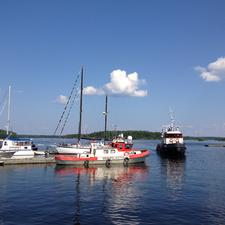
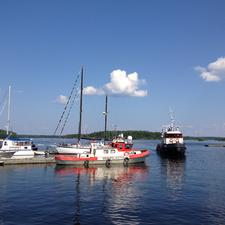

In [68]:
def image_plot():
    import requests
    from io import BytesIO
    from PIL import Image
    import numpy as np
    response = requests.get("https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png")
    image = Image.open(BytesIO(response.content))
    return ggplot() + geom_imshow(np.asarray(image))

gggrid([
    image_plot() + ggtitle("Image plot", "Default"),
    image_plot() + theme_orange() + ggtitle("Image plot", "Custom theme"),
])

### Interactive Map Plot

In [69]:
def interactive_map_plot():
    return ggplot() + geom_livemap(zoom=10) + geom_point(y=40.7127, x=-74.0059, color="red")

gggrid([
    interactive_map_plot() + ggtitle("Interactive map plot", "Default"),
    interactive_map_plot() + theme_orange() + ggtitle("Interactive map plot", "Custom theme"),
])

### Polar Bar Plot

In [70]:
def polar_bar_plot():
    return bar_plot() + scale_y_continuous(trans='symlog') + coord_polar(ylim=[-.5, None])

gggrid([
    polar_bar_plot() + ggtitle("Polar bar plot", "Default"),
    polar_bar_plot() + theme_orange() + ggtitle("Polar bar plot", "Custom theme"),
])

### Marginal Plot

In [71]:
def marginal_plot():
    return point_plot() + ggmarginal("tr", layer=geom_density())

gggrid([
    marginal_plot() + ggtitle("Marginal plot", "Default"),
    marginal_plot() + theme_orange() + ggtitle("Marginal plot", "Custom theme"),
])

### Plot Group

In [72]:
def plot_group(subtitle):
    return gggrid([bar_plot() + ggtitle("Plot group", subtitle), bar_plot()], ncol=1)

gggrid([
    plot_group("Default"),
    plot_group("Custom theme") + theme_orange()
])

## Set up Global Theme

In [73]:
LetsPlot.set_theme(theme_bw() + flavor_darcula() + theme(panel_grid=element_line(linetype='longdash')))

In [74]:
bar_plot()